In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Load Data From CSV File
df = pd.read_csv('AnimeList.csv')
cols_id = list(df.columns)

# Clean some anime episodes that havent been updated. From personal experience, animes that are Hentai genre,
# Ova, Movie, Special anime type mainly have only 1 episode
df.loc[(df["genre"]=="Hentai") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"]=="OVA") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"] == "Movie") & (df["episodes"]==0), "episodes"] = 1
df.loc[(df["type"] == "Special") & (df["episodes"]==0), "episodes"] = 1

# Adjust NaN values
for col in cols_id:
    try:
        float(df_filtered[col][0])
        df[col].fillna(df[col].median(),inplace = True)
    except:
        df[col].fillna(0, inplace = True)
df.head()

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
# Check number of individual values in each column
cols_id = list(df.columns)
for col in cols_id:
    a = len(df[col].value_counts())
    print(a, col)
    print("==============================================================================")

14477 title
5607 title_english
13702 title_japanese
8576 title_synonyms
14383 image_url
7 type
16 source
196 episodes
3 status
2 airing
10026 aired_string
9649 aired
301 duration
7 rating
630 score
5908 scored_by
10640 rank
11759 popularity
7810 members
1229 favorites
1039 background
222 premiered
442 broadcast
9420 related
3222 producer
194 licensor
779 studio
4545 genre
4328 opening_theme
5458 ending_theme


In [4]:
df_filtered = df
new = pd.DataFrame(df_filtered.groupby("type").size())
new.columns = ['count']
new = new.sort_values(by = "count")
print(new)
a = new.index.tolist()
a

         count
type          
Unknown     30
Music      849
ONA       1144
Special   1948
Movie     2624
OVA       3612
TV        4271


['Unknown', 'Music', 'ONA', 'Special', 'Movie', 'OVA', 'TV']

In [5]:
# Columns with less than 50 distinct values will beconverted to numbers, 
# the values with more population will get higher index value
first_filtered = {}
for col in cols_id:
    if len(df_filtered[col].value_counts()) < 50:
        new = pd.DataFrame(df_filtered.groupby(col).size())
        new.columns = ['count']
        new = new.sort_values(by = "count")
        a = new.index.tolist()
        converted = {}
        new_id = []
        old_i = {}
        start = 0
        for i in new.values:
            i = int(i)
            if i not in list(old_i.keys()):
                new_id.append(start)
                old_i[i] = start
                converted[a[start]] = start
                start += 1
            else:
                new_id.append(old_i[i])
        print(col)
        print(converted)
        first_filtered[col] = converted
        print("=======================")
        new["new_id"] = new_id
        df_filtered[col] = df_filtered[col].replace(new.index,new.new_id)
print("All converted attributes: ")
print(first_filtered)
df_filtered

type
{'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}
source
{'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}
status
{'Not yet aired': 0, 'Currently Airing': 1, 'Finished Airing': 2}
airing
{True: 0, False: 1}
rating
{'None': 0, 'R+ - Mild Nudity': 1, 'R - 17+ (violence & profanity)': 2, 'Rx - Hentai': 3, 'PG - Children': 4, 'G - All Ages': 5, 'PG-13 - Teens 13 or older': 6}
All converted attributes: 
{'type': {'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}, 'source': {'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}, 'status': {'Not ye

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",0,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S..."
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2003,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack","Discotek Media, Geneon Entertainment USA",Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']"
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,Fall 2007,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",Funimation,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '..."
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,Fall 2008,Fridays at 00:45 (JST),"{'Adaptation': [{'mal_id': 419, 'type': 'manga...","Fuji TV, Asmik Ace Entertainment, Sony Music E...",0,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The

In [6]:
# Clean licensor column
new_license = []
a = pd.DataFrame(df_filtered.licensor.value_counts())
a.index.name = "lisence_id"
for count in a.licensor:
    if count < 11:
        new_license.append(1)
    elif 10 < count < 50:
        new_license.append(2)
    elif count == 11105:
        new_license.append(0)
    else:
        new_license.append(3)
a['new_license'] = new_license
df_filtered['licensor'] = df_filtered['licensor'].replace(a.index, a.new_license)
df_filtered

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",3,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",3,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",3,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",0,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S..."
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2003,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack",2,Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']"
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,Fall 2007,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",3,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '..."
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,Fall 2008,Fridays at 00:45 (JST),"{'Adaptation': [{'mal_id': 419, 'type': 'manga...","Fuji TV, Asmik Ace Entertainment, Sony Music E...",0,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The Gospellers']","['""東京 et 巴里 (Tokyo and Paris)"" by Emiri Miyamo..."
9,Ouran Kouko

In [7]:
df_filtered.licensor.unique()

array([3, 0, 2, 1])

In [8]:
# Separate genres to columns
features = pd.concat([df_filtered["genre"].str.get_dummies(sep=", ")],axis=1)
features_cols = list(features.columns)
for feature_col in features_cols:
    df_filtered[feature_col] = features[feature_col]
df_filtered

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,0,0,0,0,0,1,0,0,0,0
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,0,0,0,0,0,0,0,0,0
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,0,0,0,0,0,0,0,0,0
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,0,0,0,0,1,0,0,0,0
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,1,0,0,0,0,0,0,0,0
9,Ouran Koukou Host Club,Ouran High School Host Club,桜蘭高校ホスト部,"Ohran Koko Host Club, Ouran Koukou Hosutobu, O...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Convert duration column to number
import re

new_duration = []
for time in df_filtered.duration:
    test_string = time
    temp = re.findall(r'\d+', test_string) 
    res = list(map(int, temp))
    if len(res) == 2:
        n = res[1] + 60 * res[0]
        new_duration.append(n)
    elif len(res) == 0:
        new_duration.append(0)
    else:
        new_duration.append(res[0])
df_filtered['duration'] = new_duration
df_filtered['duration'] = df_filtered.duration.mask(df_filtered.duration == 0, df_filtered['duration'].mean(skipna=True))
df_filtered

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,0,0,0,0,0,1,0,0,0,0
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,0,0,0,0,0,0,0,0,0
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,0,0,0,0,0,0,0,0,0
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,0,0,0,0,1,0,0,0,0
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,1,0,0,0,0,0,0,0,0
9,Ouran Koukou Host Club,Ouran High School Host Club,桜蘭高校ホスト部,"Ohran Koko Host Club, Ouran Koukou Hosutobu, O...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Convert Premiered Column to Year column and Season Column
new_year = []
seasons = []
for time in df_filtered.premiered:
    test_string = str(time)
    temp = re.findall(r'\d+', test_string) 
    res = list(map(int, temp))
    if len(res) == 0:
        new_year.append(0)
        seasons.append(time)
    else:
        new_year.append(res[0])
        seasons.append(str(time).replace(str(res[0]), ''))

df_filtered['year'] = new_year
df_filtered['season'] = seasons
df_filtered

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year,season
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,0,0,0,1,0,0,0,0,2012,Winter
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,2007,Spring
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,0,0,0,0,0,0,0,2008,Fall
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,0,0,0,0,0,0,0,0,2002,Summer
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,0,0,0,0,0,0,0,2012,Fall
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,0,0,0,0,0,0,0,2009,Fall
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,2003,Spring
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,0,0,1,0,0,0,0,2007,Fall
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,0,0,0,0,0,0,0,2008,Fall
9,Ouran Koukou Host Club,Ouran High School Host Club,桜蘭高校ホスト部,"Ohran Koko Host Club, Ouran Koukou Hosutobu, O...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,0,0,0,0,0,0,0,2006,Spring


In [11]:
cols_id = list(df_filtered.columns)
df_model = df_filtered[['title']]
df_not_use = df_filtered[['title']]
for col in cols_id:
    try:
        float(df_filtered[col][0])
        df_model[col] = df_filtered[col]
    except:
        df_not_use[col] = df_filtered[col]
df_model.set_index('title')
df_not_use.set_index('title')
df_model

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,title,type,source,episodes,status,airing,duration,rating,score,scored_by,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
0,Inu x Boku SS,6,13,12,2,1,24.000000,6,7.63,139250,...,0,0,0,0,1,0,0,0,0,2012
1,Seto no Hanayome,6,13,26,2,1,24.000000,6,7.89,91206,...,0,0,0,0,0,0,0,0,0,2007
2,Shugo Chara!! Doki,6,13,51,2,1,24.000000,4,7.55,37129,...,0,0,0,0,0,0,0,0,0,2008
3,Princess Tutu,6,14,38,2,1,16.000000,6,8.21,36501,...,0,0,0,0,0,0,0,0,0,2002
4,Bakuman. 3rd Season,6,13,25,2,1,24.000000,6,8.67,107767,...,0,0,0,0,0,0,0,0,0,2012
5,Yume-iro Pâtissière,6,13,50,2,1,24.000000,5,8.03,21618,...,0,0,0,0,0,0,0,0,0,2009
6,Ultra Maniac,6,13,26,2,1,24.000000,5,7.26,9663,...,0,0,0,0,0,0,0,0,0,2003
7,Shakugan no Shana II (Second),6,10,24,2,1,24.000000,6,7.72,126085,...,0,0,0,0,1,0,0,0,0,2007
8,Nodame Cantabile: Paris-hen,6,13,11,2,1,23.000000,6,8.24,53908,...,1,0,0,0,0,0,0,0,0,2008
9,Ouran Koukou Host Club,6,13,26,2,1,23.000000,6,8.34,335137,...,0,0,0,0,0,0,0,0,0,2006


In [13]:
# I can see that there are some 0 values in episodes column
df_noeps = df_model[df_model.episodes == 0]
df_noeps.head()

,title,type,source,episodes,status,airing,duration,rating,score,scored_by,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
31,Crayon Shin-chan,6,13,0,1,0,21.000000,4,7.73,17683,...,1,0,0,0,0,0,0,0,0,1992
34,One Piece,6,13,0,1,0,24.000000,6,8.54,423868,...,0,0,0,1,0,0,0,0,0,1999
67,Neko Konogoro,6,13,0,1,0,1.000000,0,3.44,18,...,0,0,0,0,0,0,0,0,0,2016
145,Carol & Tuesday,6,14,0,0,1,25.523346,0,0.00,0,...,0,0,0,0,0,0,0,0,0,2019
187,Sidonia no Kishi 3,0,13,0,0,1,24.000000,2,0.00,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
# I can see that there are some 0 values in Score column as well
df_noscores = df_model[df_model.score == 0]
df_noscores.head()

,title,type,source,episodes,status,airing,duration,rating,score,scored_by,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
55,Peace Maker Kurogane Movie 1: Omou Michi,4,13,1,0,1,25.523346,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
76,Karakuri Circus,6,13,36,0,1,25.523346,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
109,Yuu☆Yuu☆Hakusho Special,3,13,1,0,1,25.523346,6,0.0,0,...,0,0,0,0,1,0,0,0,0,0
143,Koi to Uso OVA,5,13,2,0,1,25.523346,6,0.0,1,...,0,0,0,0,0,0,0,0,0,0
145,Carol & Tuesday,6,14,0,0,1,25.523346,0,0.0,0,...,0,0,0,0,0,0,0,0,0,2019


In [15]:
# Now i see that in the episodes column and the rating column has some 0 values. Therefore, I tried to find an API
# called Encyclopedia API to update some missing episodes and ratings values

In [16]:
# Check eps and rating for anime Jinki:Extend

import xml.etree.ElementTree as ET
import urllib.request
from xml.etree.ElementTree import fromstring, ElementTree

url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime=4658"
response = urllib.request.urlopen(url).read()
response = response.decode('utf-8')
tree = ET.fromstring(response)
for child in tree:
    element = child.findall('episode')
    print("Number of eps: "+ str(len(element)))
    element = child.find('ratings').attrib
    print("Rating: " + str(element["weighted_score"]))
        

Number of eps: 13
Rating: 5.9563


In [17]:
df_report = pd.read_csv('report.csv')
anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id.head()

,id,name
0,22721,Deca-Dence
1,22689,K: Seven Stories - The Idol K
2,22688,Go Astro Boy Go!
3,22687,Nya-men
4,22686,47 Todōfuken R


In [18]:
# Check for similar missing episodes anime in my data compare to those of their data 
# and update to a new dataframe called update_eps
df_report = pd.read_csv('report.csv')
anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id = anime_id.set_index(['name'])

similar_eps = []
eps = []
count = 0
for n in df_noeps.title:
    url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime="
    if n in name_ls and n != 0:
        similar_eps.append(n)
        try:
            int(anime_id.loc[[n]].id[0])
            new_id = int(anime_id.loc[[n]].id[0])
            url += str(new_id)

            response = urllib.request.urlopen(url).read()
            response = response.decode('utf-8')
            tree = ET.fromstring(response)
            for child in tree:
                element = child.findall('episode')
                eps.append(len(element))
                if len(element) != 0:
                    count += 1
        except:
            similar_eps.remove(n)
            continue
update_eps = pd.DataFrame(eps, similar_eps, columns = ["episodes"])
print(str(count) + " of the missing episodes have been updated")
update_eps.sort_values(by=["episodes"], ascending = False).head()

11 of the missing episodes have been updated


,episodes
Sazae-san,3937
One Piece,890
Boruto: Naruto Next Generations,67
Gundam Build Divers,26
Inazuma Eleven: Ares no Tenbin,26


In [19]:
# Check for similar missing scores anime in my data compare to those of their data 
# and update to a new dataframe called update_scores
df_report = pd.read_csv('report.csv')
anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id = anime_id.set_index(['name'])

similar_scores = []
scores = []
count = 0
for n in df_noscores.title:
    url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime="
    if n in name_ls and n != 0:
        similar_scores.append(n)
        try:
            int(anime_id.loc[[n]].id[0])
            new_id = int(anime_id.loc[[n]].id[0])
            url += str(new_id)

            response = urllib.request.urlopen(url).read()
            response = response.decode('utf-8')
            tree = ET.fromstring(response)
            for child in tree:
                element = child.find('ratings').attrib
                scores.append(float(element["weighted_score"]))
                if float(element["weighted_score"]):
                    count += 1
        except:
            similar_scores.remove(n)
            continue
update_scores = pd.DataFrame(scores, similar_scores, columns = ['score'])
print(str(count) + " of the missing scores have been updated")
update_scores.sort_values(by=['score'], ascending = False).head()

35 of the missing scores have been updated


,score
Future Card Buddyfight Ace,10.0000
Promare,8.4171
Zoku Owarimonogatari,8.0710
Vinland Saga,7.9351
Overlord III,7.8185


In [20]:
# Now Use the new found values to update the model dataFrame.
for name in df_model.title:
    if name in similar_eps:
        df_model.loc[(df_model["title"]==name) & (df_model["episodes"]==0),"episodes"] = update_eps.loc[name, "episodes"]
    if name in similar_scores:
        df_model.loc[(df_model["title"]==name) & (df_model["score"]==0),"score"] = update_scores.loc[name, "score"]
    
# For the remaining 0 episodes anime, I change them to 12 which is an average number of episodes per anime season
df_model['episodes']=df_model.episodes.mask(df_model.episodes == 0, 12)

/usr/local/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
df_not_use.drop(['genre', 'premiered'], axis=1).head()

,title,title_english,title_japanese,title_synonyms,image_url,aired_string,aired,background,broadcast,related,producer,studio,opening_theme,ending_theme,season
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",Inu x Boku SS was licensed by Sentai Filmworks...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Winter
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",0,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",Spring
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",0,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",Satelight,"['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Fall
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",Princess Tutu aired in two parts. The first pa...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",Summer
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",0,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",J.C.Staff,"['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Fall


In [22]:
# At this point we have a dataset for model called df_model and the remaining unused dataset called df_not_use

In [23]:
# KNN model application

In [24]:
# KNN with KNeighborsClassifier to predict anime Score
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
# For this model, I round the score column to integers instead of floats
scores = []
for score in df_model.score:
    scores.append(round(score))
Y = pd.DataFrame(scores)

df_model1 = df_model
df_model2 = df_model
use_cols = list(df_model1.columns)
if 'score' in use_cols:
    use_cols.remove('score')
if 'title' in use_cols:
    use_cols.remove('title')
X = df_model1[use_cols].values  #.astype(float)
X[0:5]
y = Y[0].values
y[0:5]

array([8, 8, 8, 8, 9])

In [25]:
#Normalize Data
x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
x[0:2]

array([[ 1.07739539e+00,  7.16550578e-02, -5.92602243e-05,
         2.11057165e-01,  1.57626265e-01, -9.16769676e-02,
         8.92879325e-01,  2.96471031e+00, -1.10417787e+00,
        -1.67610694e+00,  3.47985980e+00,  9.54840329e-01,
         2.07580073e+00, -6.66342829e-02, -5.38330340e-01,
        -4.65883834e-01, -7.99694089e-02,  1.32559010e+00,
        -1.43720639e-01, -1.62617721e-01, -4.33912101e-01,
        -2.22851683e-01, -4.79118086e-01, -1.42967858e-01,
        -1.58085896e-01, -3.03076234e-01, -2.66191638e-01,
        -1.71358305e-01, -7.50078137e-02, -4.00700789e-01,
        -2.60644171e-01, -1.47919889e-01, -2.73701960e-01,
        -1.86569266e-01, -3.20807810e-01, -2.09009859e-01,
        -1.96832428e-01, -1.24503644e-01, -1.42463971e-01,
         2.80365210e+00, -1.10612818e-01, -3.27960576e-01,
        -4.31437093e-01, -2.25062481e-01, -2.15583692e-01,
        -6.81852351e-02,  2.67862695e+00, -7.40708588e-02,
        -3.44002486e-01, -1.76209273e-01, -2.12228988e-0

In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11582, 58) (11582,)
Test set: (2896, 58) (2896,)


In [27]:
#K nearest neighbor (K-NN)
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k, algorithm='auto').fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([6, 6, 8, 6, 7])

In [29]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6616301156967709
Test set Accuracy:  0.5345303867403315


In [30]:
#K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5355663 , 0.4913674 , 0.51899171, 0.51726519, 0.53211326,
       0.52727901, 0.53453039, 0.52866022, 0.53073204])

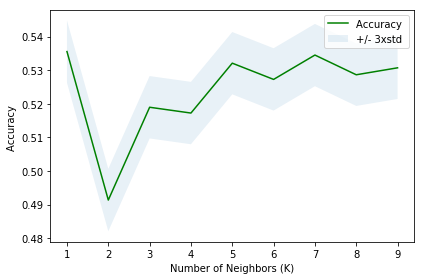

In [31]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5355662983425414 with k= 1


In [33]:
# Apply Nearest Neighbor model for recommendation

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
X

array([[6.000e+00, 1.300e+01, 1.200e+01, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [6.000e+00, 1.300e+01, 2.600e+01, ..., 0.000e+00, 0.000e+00,
        2.007e+03],
       [6.000e+00, 1.300e+01, 5.100e+01, ..., 0.000e+00, 0.000e+00,
        2.008e+03],
       ...,
       [4.000e+00, 9.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 9.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 1.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [36]:
# Here I use the Nearest Neighbor model to find the nearest 5 similar animes 
# (closest distances between the animes' attributes)
rec_neigh = NearestNeighbors(n_neighbors=6, algorithm='auto').fit(X)
distances, indexs = rec_neigh.kneighbors(X)

In [37]:
# Return the Index of the anime if its name is given in full
# Warning, the name has to be exact, even the upper case letters.
def full_id(name):
    try:
        df_model1[df_model1["title"] == name].index.tolist()[0]
        return df_model1[df_model1["title"] == name].index.tolist()[0]
    except:
        return "This is not a valid full name"

all_names = list(df_model1.title.values)

# If you only know a part of the anime name, you can get the list of possible full anime names, 
# The input can be lower case
def part_id(part):
    for name in all_names:
        if part.lower() in name.lower():
            print(name, all_names.index(name))

In [38]:
# Can get similar animes with input of anime name or anime index

def similar_animes(query=None,id=None):
    if id:
        for id in indexs[id][1:]:
            print(df_model1.iloc[id]["title"])
    if query:
        found_id = full_id(query)
        if found_id == "This is not a valid full name":
            print(found_id)
        else:
            for id in indexs[found_id][1:]:
                print(df_model1.iloc[id]["title"])

In [39]:
similar_animes(query="Naruto")

No Game No Life
Angel Beats!
Tokyo Ghoul
Code Geass: Hangyaku no Lelouch
Mirai Nikki (TV)


In [55]:
# It's well known that Naruto is a very popular anime, therefore, the 5 recommended options are very popular as well and
# some of them has many episodes and series such as Tokyo Ghoul and Code Geass with lots of fighting scenes.
# Personally, I would really recommend Angle Beats - a very touching anime

In [40]:
# When I put in a strange anime name it will cause error
similar_animes(query="Slime")

This is not a valid full name


In [41]:
# Therefore I check the available names for "slime"
part_id("slime")

Slime Boukenki: Umi da, Yeah! 1090
Tensei shitara Slime Datta Ken 3072


In [42]:
# After copy paste the name, it works!!
similar_animes(query="Slime Boukenki: Umi da, Yeah!")

Mugen no Ryvius: Illusion
Morinaga Nyuugyou x Mary to Majo no Hana
Kingdom of Chaos: Born to Kill
Fushigi na Somera-chan Special
Bamboo Blade: CM Fanfu-Fufe-Fo


In [43]:
# Now I will set up random user response to predict an anime score

In [44]:
# Some of the string attributes are categorized to numbers
print(first_filtered)

{'type': {'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}, 'source': {'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}, 'status': {'Not yet aired': 0, 'Currently Airing': 1, 'Finished Airing': 2}, 'airing': {True: 0, False: 1}, 'rating': {'None': 0, 'R+ - Mild Nudity': 1, 'R - 17+ (violence & profanity)': 2, 'Rx - Hentai': 3, 'PG - Children': 4, 'G - All Ages': 5, 'PG-13 - Teens 13 or older': 6}}


In [45]:
print(first_filtered.keys())

dict_keys(['type', 'source', 'status', 'airing', 'rating'])


In [46]:
user_qs = []
for key in use_cols:
    if key == "0":
        break
    user_qs.append(key)
print(user_qs)

['type', 'source', 'episodes', 'status', 'airing', 'duration', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'licensor']


In [47]:
genres = []
for key in use_cols:
    if key not in user_qs:
        genres.append(key)
genres.remove('year')
print(genres)

['0', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [48]:
# Here are the attributes for the user to input
print(use_cols)

['type', 'source', 'episodes', 'status', 'airing', 'duration', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'licensor', '0', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'year']


In [49]:
# Use random to random the user response invarious categories: 'type', 'source', 'status', 'airing', 'rating' and the genres
# The remaining attributes' default value would be the column's mean value, the anime year is set to 2017
import random
import numpy

user_response = {}
gen_choice = random.randint(1, 5)
gen_str = ""
for choice in range(gen_choice):
    gen_str += ", "
    gen_str += str(random.choice(genres))
gen_default = []
for gen in genres:
    if gen in gen_str:
        gen_default.append(1)
    else:
        gen_default.append(0)
response_default = []
for qs in use_cols:
    if qs not in user_qs:
        break
    if qs in first_filtered.keys():
        key_list = list(first_filtered[qs].keys()) 
        val_list = list(first_filtered[qs].values()) 
        first = random.choice(val_list)
        response_default.append(first)
        user_response[qs] = key_list[val_list.index(first)]
    else:
        response_default.append(df_model1[qs].mean())
        user_response[qs] = df_model1[qs].mean()
response_default.extend(gen_default)
response_default.append(2017)
user_response['genre'] = gen_str
user_response['year'] = 2017
print("User input is:")
print("")
print(user_response)

User input is:

{'type': 'TV', 'source': 'Picture book', 'episodes': 12.003246304738223, 'status': 'Finished Airing', 'airing': True, 'duration': 26.237322491727266, 'rating': 'PG - Children', 'scored_by': 11460.02527973477, 'rank': 5739.031634203619, 'popularity': 7220.259566238431, 'members': 22966.402679928167, 'favorites': 311.6496062992126, 'licensor': 0.6075424782428512, 'genre': ', Yaoi, Historical, Space, Parody', 'year': 2017}


In [50]:
# Return the anime score from the input
df2 = pd.DataFrame([response_default], columns=use_cols)
df_test = df_model1.append(df2, sort = True)
X_test = df_test[use_cols].values
x_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
score = neigh.predict([x_test[len(x_test) - 1]])
print("The predicted anime score is: " + str(score))

The predicted anime score is: [7]


In [54]:
# Here, an anime about Historical and Space for children which originate from Picture book has a decent score (7)
# This makes sense because this anime seems to be very interesting for children 
# and would attract lots of viewers for education material

In [51]:
# Use random to random the user response invarious categories: 'type', 'source', 'status', 'airing', 'rating' and the genres
# The remaining attributes' default value would be the column's mean value, the anime year is set to 2017
import random
import numpy

user_response = {}
gen_choice = random.randint(1, 5)
gen_str = ""
for choice in range(gen_choice):
    gen_str += ", "
    gen_str += str(random.choice(genres))
gen_default = []
for gen in genres:
    if gen in gen_str:
        gen_default.append(1)
    else:
        gen_default.append(0)
response_default = []
for qs in use_cols:
    if qs not in user_qs:
        break
    if qs in first_filtered.keys():
        key_list = list(first_filtered[qs].keys()) 
        val_list = list(first_filtered[qs].values()) 
        first = random.choice(val_list)
        response_default.append(first)
        user_response[qs] = key_list[val_list.index(first)]
    else:
        response_default.append(df_model1[qs].mean())
        user_response[qs] = df_model1[qs].mean()
response_default.extend(gen_default)
response_default.append(2017)
user_response['genre'] = gen_str
user_response['year'] = 2017
print("User input is:")
print("")
print(user_response)

User input is:

{'type': 'TV', 'source': 'Unknown', 'episodes': 12.003246304738223, 'status': 'Not yet aired', 'airing': True, 'duration': 26.237322491727266, 'rating': 'Rx - Hentai', 'scored_by': 11460.02527973477, 'rank': 5739.031634203619, 'popularity': 7220.259566238431, 'members': 22966.402679928167, 'favorites': 311.6496062992126, 'licensor': 0.6075424782428512, 'genre': ', Music', 'year': 2017}


In [52]:
# Return the anime score from the input
df2 = pd.DataFrame([response_default], columns=use_cols)
df_test = df_model1.append(df2, sort = True)
X_test = df_test[use_cols].values
x_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
score = neigh.predict([x_test[len(x_test) - 1]])
print("The predicted anime score is: " + str(score))

The predicted anime score is: [4]


In [53]:
# Here the anime that has an Unknown source with Music genre and has Rx-Hentai rate (censored info related) has a low score (4)
# This makes sense because it doesn't sound appealing to watch a porn anime that has music in it